# **Optimización de portafolios empleando Reinforcement Learing**

*   Natalia Castilla Reyes - ancastillar@unal.edu.co
*   Miguel Angel Medina Rangel - mamedinar@unal.edu.co 
*   Anni Melissa Velandia Echeverry - avelandiae@unal.edu.co

## Definición del problema:

**Portafolio: Conjunto de acciones**

En este proyecto queremos construir la solución al problema de optimización de portafolios mediante aprendizaje reforzado. Para ello, el agente está tomando continuamente la desición de como reubicar los recursos (en este caso el porcentaje de las acciones) dentro del portafolio con el objetivo de maximizar el retorno. En este caso, consideramos tratar de construir un portafolio con acciones de diferentes sectores y de esta manera disminuimos el riesgo.





## Metodología

**Para la solución del problema se plantea la siguiente metodología**

1). Construcción del tensor de precios.

Para cada una de las acciones el precio de apertura, cierre, máximo y mínimo serán escalados empleando el valor del precio de apertura, es decir para cada variable se tendra:

$$ X_i = \left[\frac{X_{i, t-n-1}}{Open_{t-n-1}},....,\frac{X_{i, t-1}}{Open_{t-1}} \right], \quad i=[Open, Close, High, Low]$$


Por lo tanto, al final del periodo $t$, el vector de precio de entrada para nuestra red neuronal) será de la forma $(x, y,z)$, en donde $x$ es el número de características, y es el número de acciones y z el número de periodos a considerar.

2). Definición del ambiente y el agente:

En este caso el mercado financiero es nuestro ambiente, tratamos de hacer lo más real posible este mercado incluyendo acciones de todo tipo. 


3). Definición de la acción

La acción realizada por un agente en el momento $t$ es reasignar el porcentaje de cada acción dentro del portafolio. Por lo tanto, determinar el vector de pesos $w_t$.

$$accion_t = w_t = [ w_{acc_1}, w_{acc_2}, ..., w_{acc_n}]$$

Adicionalmente, en el proceso de reubicación de las acciones es usual incluir un costo por transacción, este se define como:

$$cost_t = Vportafolio_{t-1}* tasa_{trans}* (w_t-w_{t-1}) $$

Este resultado se emplea cada vez que se actualiza, el costo de la transacción debe tenerse en cuenta:

$$ vectporta_t = (\sum Vportafolio_{t-1}*w_t)- (cost_t) $$


**Estados**

$$ Estado_t = (Pricetensor_t, w_{t-1}, Vportafolio_{t-1})$$

**Recompensa**

$$Reward_{t} = (Vportafolio_t/ Vportafolio_{t-1}) - 1$$

**Política: Arquitectura de red neuronal CNN**

Esta función orienta al agente sobre qué acción tomar a partir de un estado concreto, es decir cómo reasignar los pesos entre los activos para maximizar
beneficio. Para ello se emplea una red neuronal CNN para diseñar la función de política. La arquitectura de la red se muestra a continuación:

![title](https://raw.githubusercontent.com/ancastillar/Proyecto_Final_Series_Tiempo/main/datos/cnn.png)

**Anotaciones**

* La entrada de la red corresponde al tensor de precios, previamente definido, y la salida de la red es el vector de pesos $w_t$, el valor del portafolio y la recompensa en el tiempo $t$.

* El vector del valor del portafolio producido por la red
en cada paso de tiempo se almacena en una memoria de vectores 
(PVM) para ser utilizado en el siguiente paso temporal.


* Para que la red neuronal minimice el coste de la transacción, el vector del portafolio del paso de tiempo anterior se inserta antes de
la última capa. 

**Métodos de evaluación**

## Librerias

In [ ]:
!pip install selenium
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 958 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 73.8 MB/s 
     |████████████████████████████████| 356 kB 73.6 MB/s 
     |████████████████████████████████| 3.6 MB 46.2 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 109 kB 5.2 MB/s 
     |████████████████████████████████| 127 kB 29.3 MB/s 

In [ ]:
 import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
from selenium import webdriver


import requests
from bs4 import BeautifulSoup

from time import sleep
from random import randint
import time
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import holidays
from datetime import datetime, timedelta
%config InlineBackend.figure_format = 'retina'

#####Globals

end_ = datetime.today()
start_ = end_ - timedelta( days = 1100)

##### Rutaa

ruta = "/content/drive/MyDrive/proyecto_topicos_2/"

####Plots

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import holidays

 #................

import tensorflow as tf
import tqdm
import numpy as np


## Obtención de datos

Los datos de las acciones se han extraído mediante una combinación de
pandas datareader que toma los datos de Yahoo! Finance y Selenium que toma los datos de NASDAQ.


Por otra parte, para la selección de acciones, se ha considerado la diversificación en diferentes sectores. Los diferentes sectores considerados fueron Energía, Materiales Básicos e Industriales, Bienes de consumo, salud, finanzas, tecnologías de la información, comunicaciones e inmobiliario.


**Sobre los datos**

Los datos siguen el formato de Apertura, Máximo, Mínimo y
Cierre (OHLC) para un periodo determinado. La apertura es el precio al que comienza a cotizar la acción, el de alta es el valor más alto que alcanza a lo largo del periodo, el de baja es el más bajo y el Cierre es el valor del precio de cierre al final del periodo. Normalmente, el precio de apertura
es igual al precio de cierre del periodo anterior.

 **La descripción de las empresas de las acciones escogidas se muestran a continuación:**

In [ ]:
def stock_returns(ticker_list, start, end):

    list_of_df = []
    not_found = []
    
    for ticker in ticker_list:
        try:
            df= pdr.get_data_yahoo(ticker, start, end)
            df = df.reset_index()
            df.rename(columns={'Date':'date'})
            df['ticker'] = [ticker] * len(df)
            list_of_df.append(df)
        except ValueError:
            print("Not Found: "+ticker)
            not_found.append(ticker)
    
    return list_of_df, not_found

########################################################################################


def scrape_nasdaq(ticker_list):
    tckr_data = {}
    count = 1
    for ticker in ticker_list:
        print("Scraping count: " + str(count))
        
        url = 'https://old.nasdaq.com/symbol/'+ticker+'/historical'
        driver.get(url)
        
        # Choose 10 year data from a drop down
        data_range = driver.find_elements_by_name('ddlTimeFrame')
        
        if len(data_range)>0:
            for option in data_range[0].find_elements_by_tag_name('option'):
                if option.text == '10 Years':
                    option.click()
                    break
            time.sleep(5)
            page_source = driver.page_source
    
            #Generating a soup object to parse data from the URL
            soup = BeautifulSoup(page_source, 'lxml')
    
            #Searching for historical table
            tags = soup.find_all('div', id="historicalContainer")
    
            #Getting the data
            temp_data=[]
    
            for tag in tags:
                rows = tag.findAll('tr')
                for tr in rows:
                    cols=tr.findAll('td')
                    val = [tr.text for tr in cols]
                    temp_data.append(val)
            
            #Cleaning the data
            for i in range(len(temp_data)):
                to_process = temp_data[i]
    
                for i in range(len(to_process)):
                    temp = to_process[i]
                    temp = temp.strip()
                    to_process[i] = temp
         
            #Getting the data
            temp_data = temp_data[2:]
            
            if tckr_data.get(ticker) == None:
                tckr_data[ticker] = temp_data
        
            # Time Pause to prevent blocking
            print("Random Sleep")
            sleep(randint(2, 4))
            count+=1
        
        else:
            print("Not Found" + ticker)
        
    #Generating the frame
    date = []
    Open = []
    high = []
    low = []
    close = []
    volume = []
    ticker = []

    for key, value in tckr_data.items():
        for data in value:
            date.append(data[0].replace('/','-'))
            Open.append(data[1])
            high.append(data[2])
            low.append(data[3])
            close.append(data[4])
            volume.append(data[5].replace(',',''))
            ticker.append(key)  
            
    final_dict = {'date' : date, 'Open':Open, 'High':high, 'Low':low, 'Close':close, 'Volume':volume, 'ticker':ticker}
    
    df = pd.DataFrame(final_dict)
    cols = ['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker']
    df = df[cols]

    return df

####################################################################################33

def get_stocks_data(ticker_set, start, end):
    #Stocks data for a year from Yahoo Data
    stocks_1, not_found = stock_returns(ticker_set, start, end)
    
    if len(not_found) > 0:
    
        #Stocks_data for remaining tickers from Nasdaq
        stocks = scrape_nasdaq(not_found)
    
        #Merging them into one dataframe
        stocks_1 = pd.concat(stocks_1)

        stocks_1 = stocks_1.rename(columns={'Date' : 'date'})
        stocks_1 = stocks_1[['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ticker']]
        stocks_1['date'] = stocks_1['date'].dt.date

        stocks = stocks.rename(columns={'Ticker' : 'ticker'})
        stocks[['Open', 'High', 'Low', 'Close', 'Volume']] = stocks[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
    
        stocks_final = pd.concat([stocks_1, stocks])
        return stocks_final
    
    else:
        return pd.concat(stocks_1)

In [ ]:
#tickers = ['EC', "AVAL", "CIB", "GCHOY"]
tickers = ['TSLA', 'AAPL', 'XOM' ,'VMC', 'BA', 'AMZN', 'TGT', 'WMT', 'KO', 'UNH', 'JPM', 'GOOGL', 'STT', 'MSFT', 'VZ', 'XEL', 'SPG']
df = get_stocks_data(tickers, start=start_, end=end_)

In [ ]:
print(df)
#print(tckr_data)

                  High         Low        Open  ...  ticker  Holiday        Day
Date                                            ...                            
2019-01-31   62.312000   58.799999   60.200001  ...    TSLA    False   Thursday
2019-02-01   63.220001   60.700001   61.084000  ...    TSLA    False     Friday
2019-02-04   63.060001   60.375999   62.596001  ...    TSLA    False     Monday
2019-02-05   64.487999   62.450001   62.498001  ...    TSLA    False    Tuesday
2019-02-06   64.848000   63.124001   63.917999  ...    TSLA    False  Wednesday
...                ...         ...         ...  ...     ...      ...        ...
2022-01-28  146.440002  139.669998  143.559998  ...     SPG    False     Friday
2022-01-31  147.600006  143.610001  144.860001  ...     SPG    False     Monday
2022-02-01  148.660004  145.039993  147.199997  ...     SPG    False    Tuesday
2022-02-02  149.979996  146.910004  148.009995  ...     SPG    False  Wednesday
2022-02-03  149.189896  145.339996  147.

In [ ]:
print("Dimension of df", df.shape)
#df.to_csv(ruta+"data/stocks.csv", index=False)

Dimension of df (12920, 8)


## EDA 

In [ ]:
## Comprobando valores nulos
pd.pivot_table(df, values ='Close', index =['Date'], columns =['ticker']).isnull().values.any()

False

**Agrupando los datos por semena, excluyendo los datos en días feriados en USA**

In [ ]:
us_holidays = holidays.US()

df['Date'] = pd.to_datetime(df['Date'])
df['Holiday'] = df.Date.apply(lambda x: x in us_holidays)
df['Day'] = df['Date'].dt.day_name()
df = df.loc[df['Holiday'] == False]
df = df.loc[~df.Day.isin(['Saturday', 'Sunday'])]

In [ ]:
### Cálculo de la rentabilidad de las acciones
list_of_stock = []

for tick in list(set(df['ticker'])):
    df_stocks = df.loc[df['ticker'] == tick]
    df_stocks['daily return'] = df_stocks['Close'].pct_change(1)
    list_of_stock.append(df_stocks)
    
returns_stocks = pd.concat(list_of_stock)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for ticker in list(set(returns_stocks['ticker'])):
    temp = returns_stocks.loc[returns_stocks['ticker'] == ticker]
    print(ticker+' has data for '+str(len(set(temp.index)))+' days')

TSLA has data for 753 days
VZ has data for 753 days
XOM has data for 753 days
STT has data for 753 days
KO has data for 753 days
VMC has data for 753 days
UNH has data for 753 days
MSFT has data for 753 days
BA has data for 753 days
XEL has data for 753 days
AAPL has data for 753 days
AMZN has data for 753 days
JPM has data for 753 days
SPG has data for 753 days
WMT has data for 753 days
TGT has data for 753 days
GOOGL has data for 753 days


**Plotting**

In [ ]:
returns_stocks = stocks_data.copy()

NameError: ignored

In [ ]:
# Reshaping data

returns_stocks['Date'] = pd.to_datetime(returns_stocks['Date'])
filter_mask = returns_stocks['Date'] > pd.Timestamp(2016, 1, 1)
filtered_df = returns_stocks[filter_mask]
returns_stocks_reshaped = filtered_df.pivot(index='Date', columns='ticker', values='daily return')
returns_stocks_reshaped = returns_stocks_reshaped.reset_index()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['STT'],
                name = "State Street Corp.",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='green',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['GOOGL'],
                name = "Google",
                line_color ='coral',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AMZN'],
                name = "Amazon",
                line_color ='yellow',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['VMC'],
                name = "Vulcan Materials Company",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['BA'],
                name = "The Boeing Company",
                line_color ='dark blue',
                opacity = 0.5))


fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['TSLA'],
                name = "Tesla",
                line_color ='Fuchsia',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['TGT'],
                name = "Target Corp.",
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['WMT'],
                name = "Walmart Corp.",
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['KO'],
                name = "Coca-Cola Company.",
                opacity = 0.5))


fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['UNH'],
                name = "UnitedHealth Group",
                line_color="dimgray",
                opacity = 0.5))


fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['JPM'],
                name = "JP Morgan Chase",
                line_color="black",
                opacity = 0.5))


fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['MSFT'],
                name = "Microsoft",
                line_color="cyan",
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['VZ'],
                name = "Verizon Commun.",
                opacity = 0.5))


fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XEL'],
                name = "Xcel Energy",
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['SPG'],
                name = "Simon Property Group",
                line_color="indigo",
                opacity = 0.5))


# Use date string to set xaxis range
fig.update_layout(xaxis_range = [start_,end_],
                  title_text = 'Retorno de las acciones en los últimos tres años')
fig.update_yaxes(title_text = 'Retorno')
fig.update_xaxes(title_text = 'Periodo de tiempo')
fig.show()

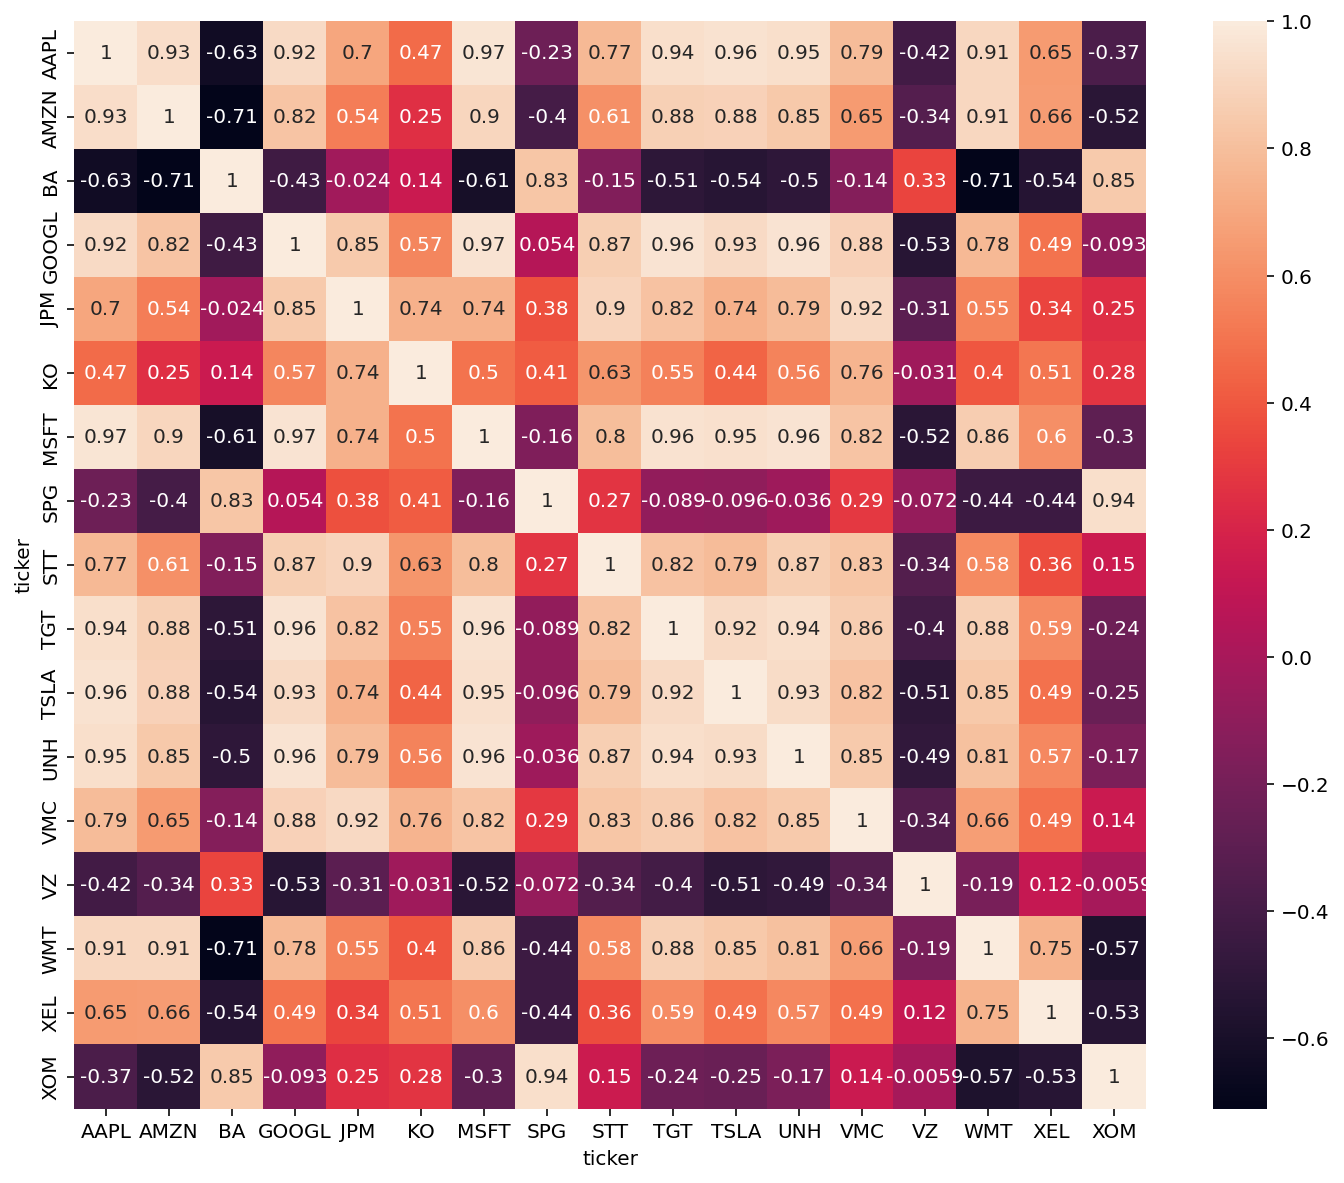

In [ ]:
#df.set_index('Date', inplace=True)
corr_df = pd.pivot_table(df, values ='Close', index =['Date'], columns =['ticker'])
correlation_stocks = corr_df.corr()
plt.figure(figsize=(12, 10))
sns_plot = sns.heatmap(correlation_stocks, annot=True)
#plt.savefig(ruta+"plots/"+ 'Correlation.png')

 ### Preprocesamiento de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stocks_data = pd.read_csv("/content/drive/Shareddrives/Proyecto/data/stocks.csv")


In [ ]:
#Number of days stocks are traded in a year
nbr_trading_days = 252
stocks_data = pd.read_csv("/content/drive/Shareddrives/Proyecto/data/stocks.csv")
#stocks_data = pd.read_csv("/Compartidos conmigo/proyecto_topicos_2/data/stocks.csv")
stocks_data  = stocks_data.sort_values(['ticker', 'Date'])
print('acciones consideradas: ' + str(np.unique(stocks_data['ticker'])))

#Cálculo de la rentabilidad media y de la matriz de covarianza
pivot_table = pd.pivot_table(stocks_data, values='Close', index=['Date'],columns=['ticker'])
returns = pivot_table.pct_change().dropna()
stocks_returns_mean = returns.mean()
stocks_covariance_matrix = returns.cov()


def get_input_data(data_table, ticker_column_name):

    open_values = list()
    close_values = list()
    high_values = list()
    low_values = list()

    for ticker in np.unique(data_table[ticker_column_name]):
      
        open_value_list = data_table['Open'].loc[data_table[ticker_column_name]==ticker]
        open_values.append(open_value_list[1:].reset_index(drop = True) / open_value_list[:-1].reset_index(drop = True))
        close_values.append(data_table['Close'].loc[data_table[ticker_column_name]==ticker][:-1] / open_value_list[:-1])
        high_values.append(data_table['High'].loc[data_table[ticker_column_name]==ticker][:-1] / open_value_list[:-1])
        low_values.append(data_table['Low'].loc[data_table[ticker_column_name]==ticker][:-1] / open_value_list[:-1])
    
    return np.array([close_values,
                     high_values,
                     low_values,
                     open_values])


stocks_input_array = get_input_data(stocks_data, 'ticker')
np.save(ruta+"data/"+'stocks_data_input.npy', stocks_input_array)
print('Dimension del input : ' + str(stocks_input_array.shape))



acciones consideradas: ['AAPL' 'AMZN' 'BA' 'GOOGL' 'JPM' 'KO' 'MSFT' 'SPG' 'STT' 'TGT' 'TSLA'
 'UNH' 'VMC' 'VZ' 'WMT' 'XEL' 'XOM']
Dimension del input : (4, 17, 758)


In [ ]:
stocks_input_array

array([[[0.99436522, 1.01863315, 1.01215051, ..., 1.01601668,
         0.99665003, 0.97957676],
        [1.0013684 , 1.02607847, 0.99973879, ..., 1.02391331,
         0.99178745, 0.97557345],
        [1.00620325, 1.00068179, 0.99875177, ..., 1.03358854,
         1.0016583 , 1.00742404],
        ...,
        [1.00497453, 1.00817009, 1.00437817, ..., 0.99993059,
         0.99832969, 1.01422303],
        [0.99857143, 1.01961985, 1.01005025, ..., 0.9842181 ,
         1.00365818, 1.0040733 ],
        [1.00589802, 0.99610843, 1.00308039, ..., 1.03570909,
         1.        , 0.99311016]],

       [[1.00278421, 1.02076259, 1.01829111, ..., 1.01659694,
         1.00601861, 1.00477868],
        [1.02055725, 1.0264461 , 1.01233807, ..., 1.03003096,
         1.00181902, 1.0058759 ],
        [1.01323947, 1.00375002, 1.0070922 , ..., 1.03842105,
         1.01911654, 1.02087739],
        ...,
        [1.01026665, 1.01183615, 1.00969457, ..., 1.002843  ,
         1.00194887, 1.0156871 ],
        [1.0

## **Definición del ambiente**

In [ ]:
class RLEnv():
    
    """
    Esta clase nos ayuda a definir el ambiente 
    
    PortfolioValue: Valor del portafolio
    TransCost: Costo de la transaccion que tiene que ejecutar el agente para ejecutar la acción
    ReturnRate: Cambio porcentual en el portafolio
    WindowSize: Numero de periodos que debemos considerar
    SplitSize: % de los datos para entrenamiento.
    """
    
    def initialize(self, Path, PortfolioValue = 10000, TransCost = 0.0025, ReturnRate = 0.02/250, 
                   WindowSize = 50, TrainTestSplit = 0.7):
        
        
        # Cargando los datos
        self.Dataset = np.load(Path)
        
        # Numero de acciones y variables que estamos teniendo en cuenta
        self.NumStocks = self.Dataset.shape[1]
        self.NumValues = self.Dataset.shape[0]
        
        # Inicializando los valores.
        self.PortfolioValue = PortfolioValue
        self.TransCost = TransCost
        self.ReturnRate = ReturnRate
        self.WindowSize = WindowSize
        self.Done = False
        
        # Inicializando el vector de estados
        self.state = None
        self.TimeLength = None
        self.Terminate = False
        
        # Termination cutoff
        self.TerminateRows = int((self.Dataset.shape[2] - self.WindowSize) * TrainTestSplit)
        
    def UpdatedOpenValues(self, T):
        #Esta función nos ayuda  actualizar el vector de open price
        return np.array([1+self.ReturnRate]+self.Dataset[-1,:,T].tolist())
    
    def InputTensor(self, Tensor, T):
        #Vamos recorriendo el tensor 
        return Tensor[: , : , T - self.WindowSize:T]
    
    def ResetEnvironment(self, InitWeight, InitPortfolio, T):

        #Definición del portafolio
        self.state= (self.InputTensor(self.Dataset, self.WindowSize) , InitWeight , InitPortfolio)
        self.TimeLength = self.WindowSize + T
        self.Done = False
        
        return self.state, self.Done
    
    def Step(self, Action):
        """
        Aquí obtenemos la acción que debemos realizar en el tiempo t, por lo tanto obtenemos un nuevo vector de pesos,
        el valor de la recompensa y un nuevo valor para el portafolio.
        """
        
        # Obtenemos el tensor
        Dataset = self.InputTensor(self.Dataset, self.index)
    
    
        # Vectores actuales de pesos y valores del portafolio
        weight_vector_old = self.state[1]
        portfolio_value_old = self.state[2]
        
        # Actualizar el precio de apertura
        NewOpenValues = self.UpdatedOpenValues(index)
        
        # El agente proporciona nuevas acciones, es decir, un nuevo vector de pesos usando la reubicación de las acciones
        WeightAllocation = Action
        PortfolioAllocation = portfolio_value_old
        
        # Para reubicar el portafolio debemos usar los pesos y el costo de la transaccion

        TransactionCost = PortfolioAllocation * self.TransCost * np.linalg.norm((WeightAllocation-weight_vector_old),ord = 1)
        
        # Para encontrar el nuevo vector de pesos, obtenemos el valor presente del portafolio
        # Para obtener el valor del vector de las acciones, se necesita multiplicar el portafolio con el vector actual de pesos        

        ValueAfterTransaction = (PortfolioAllocation * WeightAllocation) - np.array([cost]+ [0]*self.nb_stocks)
        
        #Actualizamos el valor de las acciones
        NewValueofStocks = ValueAfterTransaction * NewOpenValues
        
        #El nuevo valor del portafolio se obtiene a partir de la suma del valor de las acciones.
        NewPortfolioValue = np.sum(NewValueofStocks)
        
        #Para obtener el nuevo vector de pesos dividimos el valor de cada acción con respecto al nuevo valor del portafolio
        NewWeightVector = NewValueofStocks/NewPortfolioValue
        
        # Después de cada paso de tiempo calculamos la recompensa está puede ser positiva o negativa.
       
        RewardValue = (NewPortfolioValue - portfolio_value_old)/(portfolio_value_old)

        self.index = self.index + 1
        
        # Creamos el nuevo estado
        self.state = (self.InputTensor(self.Dataset, self.index), NewWeightVector, NewPortfolioValue)
        

        if index >= self.TerminateRows:
            self.Done = True
            
        return self.state, self.RewardValue, self.Done  

In [ ]:
def main(stocks = True):

	env_pf_optimizer = RLEnv(Path = data_path, PortfolioValue = portfolio_value_init, TransCost = trading_cost, 
		ReturnRate = interest_rate, WindowSize = num_trading_periods, TrainTestSplit = train_data_ratio)

#---------------------------------------- training - Using the RL framework ------------------------------------
	tf.reset_default_graph()

	with tf.Session() as sess:

		# initialize networks
		pf_opt_agent = PolicyCNN()

		# initialize tensorflow graphs
		sess.run(tf.global_variables_initializer())
  
##########################-------------------------------
#-------------------------------------------------------------------------------------------



main()

NameError: ignored